<a href="https://colab.research.google.com/github/divik544/FashionMNIST/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First install tensorflow_datasets. -U flag here tells to upgrade all modules to their latest versions

In [1]:
!pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.2)


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

# Will be removed in 2.0
# Removes the need of adding graph to Session
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


Load the Fashion MNIST dataset and split into training and test sets.

no. of examples in training = 60000

no. of examples in test = 10000

In [0]:
ds,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_ds,test_ds = ds['train'],ds['test']

In [4]:
num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print(num_train,num_test)

60000 10000


Normalize the dataset i.e., convert each pixel value between [0,1]

In [0]:
def normalize(image,label):
  image = tf.cast(image,tf.float32)
  image /= 255
  return image,label


test_ds = test_ds.map(normalize)
train_ds = train_ds.map(normalize)

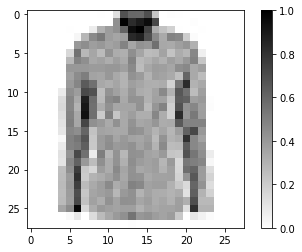

In [6]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_ds.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Now we will build a neural network to classify images. The input layer has 784 units(28x28). The hidden layer has 128 units along with relu as activation function. Finally the output layer has 10 units representing our 10 classes. softmax activation is used. It ensures that the probabilty sums up to 1 of output units.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [0]:
# optimizer will choose its learning rate
# consider loss as default for classification problems
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Specify iteration behaviour
- .repeat() specifies to run forever. The no. of iterations will be decided by no. of epochs in fit funtion
- shuffle() shuffles the data
- batch size tells model.fit to use batch size of 32 when updating model parameters

In [0]:
BATCH_SIZE = 32
train_ds = train_ds.repeat().shuffle(num_train).batch(BATCH_SIZE)
test_ds = test_ds.batch(BATCH_SIZE)

In [10]:
model.fit(train_ds,epochs=5,steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4978 - acc: 0.8251
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3750 - acc: 0.8650
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3354 - acc: 0.8771
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3137 - acc: 0.8831
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2956 - acc: 0.8903


We achieved 89% accuracy on our Training data

In [11]:
test_loss,test_accuracy = model.evaluate(test_ds,steps=math.ceil(num_test/32))
print('Accuracy on test dataset ',test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3471 - acc: 0.8781
Accuracy on test dataset  0.8781


As we can see the our model has accuracy of 88% on our test data